# Conjunto de datos
from google.colab import drive
drive.mount('/content/gdrive')

In [102]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import itertools
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score

In [103]:
df = pd.read_excel("/media/lecun/HD/Expor2/ME22_Concentration_Particles_Raw data.xlsx")

# Feature prunning

Buscamos por valores vacios o NaN

In [104]:
# Set the option to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Your code for checking missing values
result = df.isna().sum() * 100 / df.shape[0]
print(result)

# Reset the display options to their default values if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


Sample                                  0.0
Particle Id                             0.0
Group                                   0.0
Score                                   0.0
PM80-1 (µg/m3)                          0.0
Particle # conc. (#particle/m3)         0.0
CmNormPM10-PM2.5 (µg/m3)                0.0
Mass deposition (µg/cm2/s)              0.0
Number deposition (#particles/cm2/s)    0.0
MassMicrogram (µg)                      0.0
dAero  (µm)                             0.0
VolumeMicron3                           0.0
AreaMicron2                             0.0
AspectRatio                             0.0
CentroidShift                           0.0
Circularity                             0.0
Compactness                             0.0
Convexity                               0.0
Count                                   0.0
Dispersion                              0.0
ECDMicron                               0.0
EEAMicron                               0.0
EEBMicron                       

Tenemos un df limpio sin valores nulos on NaN (Not a number). Veamos si alguna de estas columnas tienen todos sus valores en cero.

In [105]:
# Iterate over all columns
for column_name in df.columns:
    if all(df[column_name].isin([0, 0.0])):
        print(f'The column {column_name} has all values equal to 0 or 0.0.')
    else:
        print(f'The column {column_name} has some non-zero values.')


The column Sample has some non-zero values.
The column Particle Id has some non-zero values.
The column Group has some non-zero values.
The column Score has some non-zero values.
The column PM80-1 (µg/m3) has some non-zero values.
The column Particle # conc. (#particle/m3) has some non-zero values.
The column CmNormPM10-PM2.5 (µg/m3) has some non-zero values.
The column Mass deposition (µg/cm2/s) has some non-zero values.
The column Number deposition (#particles/cm2/s) has some non-zero values.
The column MassMicrogram (µg) has some non-zero values.
The column dAero  (µm) has some non-zero values.
The column VolumeMicron3 has some non-zero values.
The column AreaMicron2 has some non-zero values.
The column AspectRatio has some non-zero values.
The column CentroidShift has some non-zero values.
The column Circularity has some non-zero values.
The column Compactness has some non-zero values.
The column Convexity has some non-zero values.
The column Count has some non-zero values.
The col

Borramos las columnas con valor 0 en mas del 90% de sus valores.

In [106]:
columns_to_drop = [col for col in df.columns if (df[col] == 0).mean() > 0.99
                  ]
print(f'Dropped columns: {columns_to_drop}')
print(f'Number of dropped columns: {len(columns_to_drop)}')

Dropped columns: ['Porosity', 'H', 'He', 'Li', 'Be', 'B', 'Ne', 'Ar', 'Sc', 'V', 'Co', 'Ni', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es']
Number of dropped columns: 77


In [107]:
dropped_zeros = df.drop(columns=columns_to_drop).copy()


Tambien eliminamos las features que tengan una varianza menor a 0.1.

In [108]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0.1 # Adjust the threshold as needed
selector = VarianceThreshold(threshold)
# Fit and transform the data
X_selected = selector.fit_transform(dropped_zeros.iloc[:,4:])

# Get the selected features
selected_features = dropped_zeros.iloc[:,4:].columns[selector.get_support()]
features_to_drop = [ feature for feature in dropped_zeros.iloc[:,4:].columns if feature not in selected_features]
print(f'Feature to drop: {features_to_drop}, Number: {len(features_to_drop)}')

Feature to drop: ['PM80-1 (µg/m3)', 'CmNormPM10-PM2.5 (µg/m3)', 'Mass deposition (µg/cm2/s)', 'Number deposition (#particles/cm2/s)', 'MassMicrogram (µg)', 'Circularity', 'Compactness', 'Convexity', 'Eccentricity', 'FractalDimH', 'FractalDimR', 'Grain12', 'Grain3', 'Grain6', 'GrayMean', 'GrayStd', 'InertiaRatio', 'JumpRatio', 'Solidity', 'Y', 'Sn'], Number: 21


In [109]:
df_dropped = dropped_zeros.drop(columns=features_to_drop).copy()

In [110]:
df_dropped

,Sample,Particle Id,Group,Score,Particle # conc. (#particle/m3),dAero (µm),VolumeMicron3,AreaMicron2,AspectRatio,CentroidShift,...,K,Ca,Ti,Cr,Mn,Fe,Cu,Zn,Ba,W
0,BO22_Car_p1_sec. analysis,16,Biogenic_Organic,0.961,298.552352,6.783,163.405,36.140,4.468,0.281,...,1.060,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
1,BO22_Car_p1_sec. analysis,22,Biogenic_Organic,0.972,400.144760,5.859,105.310,26.964,4.258,0.625,...,1.132,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
2,BO22_Car_p1_sec. analysis,130,Biogenic_Organic,0.963,771.693922,4.219,39.321,13.983,1.189,0.708,...,0.720,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
3,BO22_Car_p1_sec. analysis,132,Biogenic_Organic,0.963,1270.575606,3.288,18.612,8.492,1.444,2.267,...,1.913,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
4,BO22_Car_p1_sec. analysis,150,Biogenic_Organic,0.780,1556.176408,2.971,13.731,6.932,1.038,0.087,...,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7415,ME22_TLY_P2,1446,Tire wear,0.973,136.383237,8.743,144.924,33.352,1.559,0.360,...,0.333,1.759,0.0,0.000,0.0,10.721,0.0,0.0,0.0,0.0
7416,ME22_TLY_P2,1500,Tire wear,0.989,297.297857,5.922,45.029,15.301,1.406,0.208,...,0.000,2.212,0.0,0.000,0.0,8.667,0.0,0.0,0.0,0.0
7417,ME22_TLY_P2,1614,Tire wear,0.384,200.269512,7.215,81.444,22.719,1.174,1.272,...,0.645,0.783,0.0,2.614,0.0,11.889,0.0,0.0,0.0,0.0
7418,ME22_TLY_P2,1662,Tire wear,0.964,540.049822,4.394,18.392,8.423,1.089,0.150,...,0.398,12.860,0.0,0.000,0.0,10.304,0.0,0.0,0.0,0.0


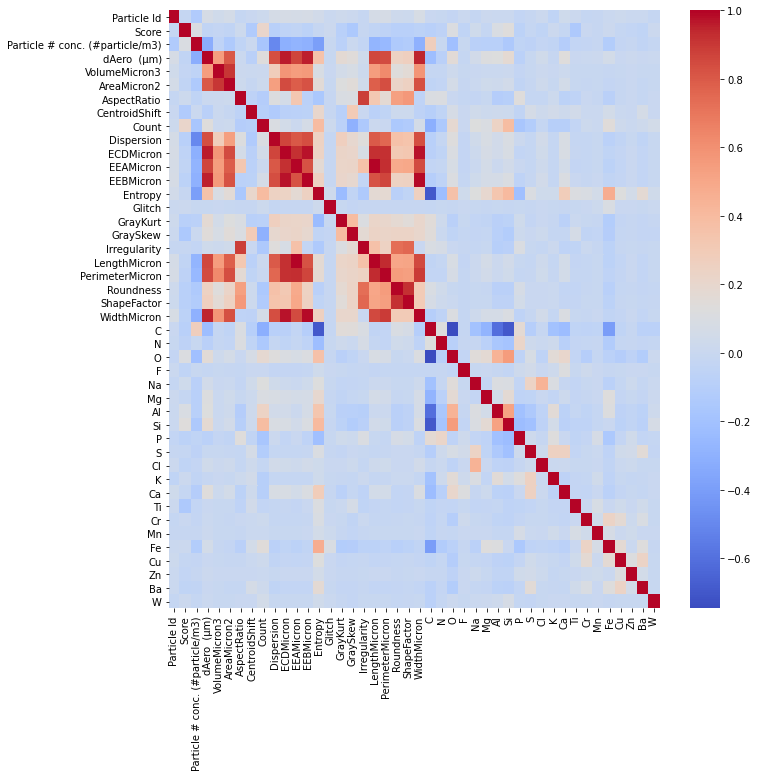

In [111]:
corr_matrix = df_dropped.corr()
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(corr_matrix, cmap='coolwarm', ax=ax)
plt.show()

## Feature Engineering

Primero, estandarizamos las features para normalizar la data con media 0 y std 1

In [112]:
from sklearn.preprocessing import StandardScaler
columns_to_standardize = df_dropped.columns[4:]
scaler = StandardScaler()
df_stand = df_dropped.copy()
df_stand[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

feature_columns = df_stand.columns[4:]
X = df_stand[feature_columns]
y = df_stand['Group']

# Encoding
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)


Se prueba el metodo de Feature ranking con recursive feature elimination.

Dado un estimador externo que asigna pesos a las características (por ejemplo, los coeficientes de un modelo lineal), el objetivo de la eliminación recursiva de características (RFE) es seleccionar características considerando recursivamente conjuntos cada vez más pequeños de características. Primero, se entrena el estimador en el conjunto inicial de características y la importancia de cada característica se obtiene. Luego, las características menos importantes se eliminan del conjunto actual de características. Este procedimiento se repite de manera recursiva en el conjunto podado hasta que se alcanza finalmente el número deseado de características a seleccionar.

In [114]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR


estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=20, step=1)
selector = selector.fit(X, y_numeric)

In [115]:
selector.score(X, y_numeric)

0.27228753956163876

La seleccion recursiva basada en un modelo lineal no encontro un modelo con buenos resultados, sugiriendo relaciones no lineales entre las features y targets de la data.

In [116]:
import itertools
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score


# Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=50, max_depth=5, max_features='sqrt', random_state=42)

classifier.fit(X,y_numeric)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

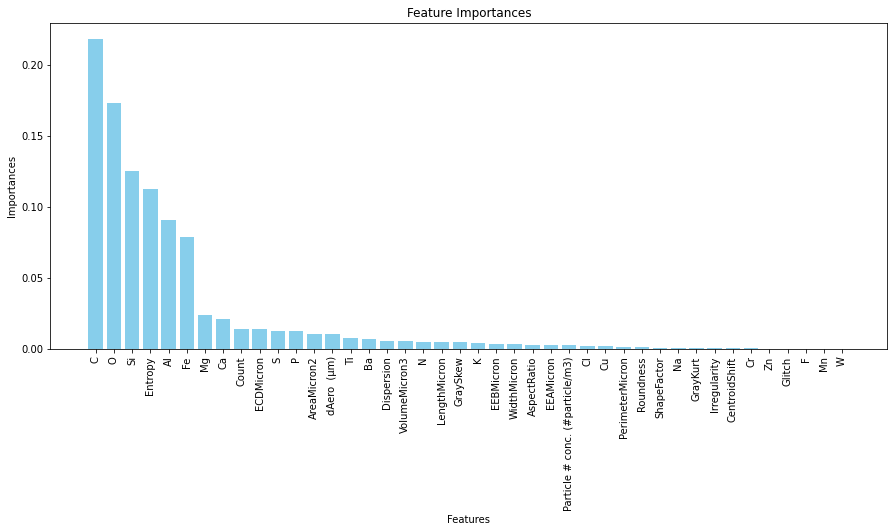

In [144]:
#get the most important features
importances = classifier.feature_importances_

#create dataframe for visualization
final_df = pd.DataFrame({'Features': pd.DataFrame(X).columns, 
                        "Importances": importances})
final_df.set_index('Importances')

#sor in ascending order
final_df = final_df.sort_values('Importances', ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(final_df['Features'], final_df['Importances'], color='skyblue')
plt.xlabel('Features')
plt.xticks(rotation='vertical')
plt.ylabel('Importances')
plt.title('Feature Importances')
plt.show()

In [136]:
final_df

,Features,Importances
21,C,0.218773
23,O,0.173349
28,Si,0.125891
11,Entropy,0.112569
27,Al,0.091278
37,Fe,0.079302
26,Mg,0.024442
33,Ca,0.021639
6,Count,0.014255
8,ECDMicron,0.013997


In [119]:
importances

array([2.94180789e-03, 1.05796110e-02, 5.57694197e-03, 1.10702795e-02,
       3.31090201e-03, 7.21245863e-04, 1.42547886e-02, 6.00935605e-03,
       1.39973870e-02, 2.95886939e-03, 3.95160020e-03, 1.12569342e-01,
       2.29330820e-04, 8.65940474e-04, 4.91365082e-03, 7.72333014e-04,
       4.96521243e-03, 1.80862249e-03, 1.50398726e-03, 1.19380798e-03,
       3.57042555e-03, 2.18773300e-01, 5.29137472e-03, 1.73348541e-01,
       6.21621549e-05, 1.17442216e-03, 2.44415847e-02, 9.12777104e-02,
       1.25891370e-01, 1.26753282e-02, 1.27214002e-02, 2.42006743e-03,
       4.21787496e-03, 2.16387348e-02, 8.00910962e-03, 6.82546399e-04,
       5.85169735e-05, 7.93024214e-02, 2.41107442e-03, 3.25574674e-04,
       7.50324201e-03, 8.20134968e-06])

# Check for class imbalance

<Axes: >

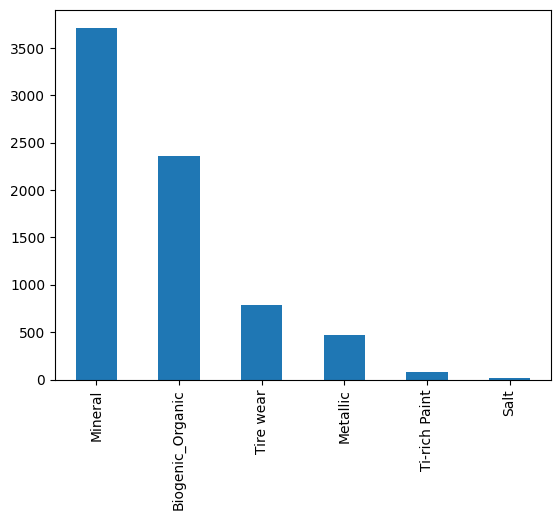

In [ ]:
df.Group.value_counts().plot(kind='bar')

In [ ]:
import numpy as np
u, c =np.unique(df.Group, return_counts=True)
print(dict(zip(u,c)))

{'Biogenic_Organic': 2355, 'Metallic': 465, 'Mineral': 3716, 'Salt': 12, 'Ti-rich Paint': 83, 'Tire wear': 789}


# Chemical features
Chemical feature distributions per target

In [ ]:
pd.set_option('display.max_columns', None)
mineral_df = df[df.Group == 'Mineral']

In [ ]:
chemic_features = ["Si", "C", "O", "P", "Cl", "Na", "Ca", "Al", "Fe"] # select most important elements.

<Axes: >

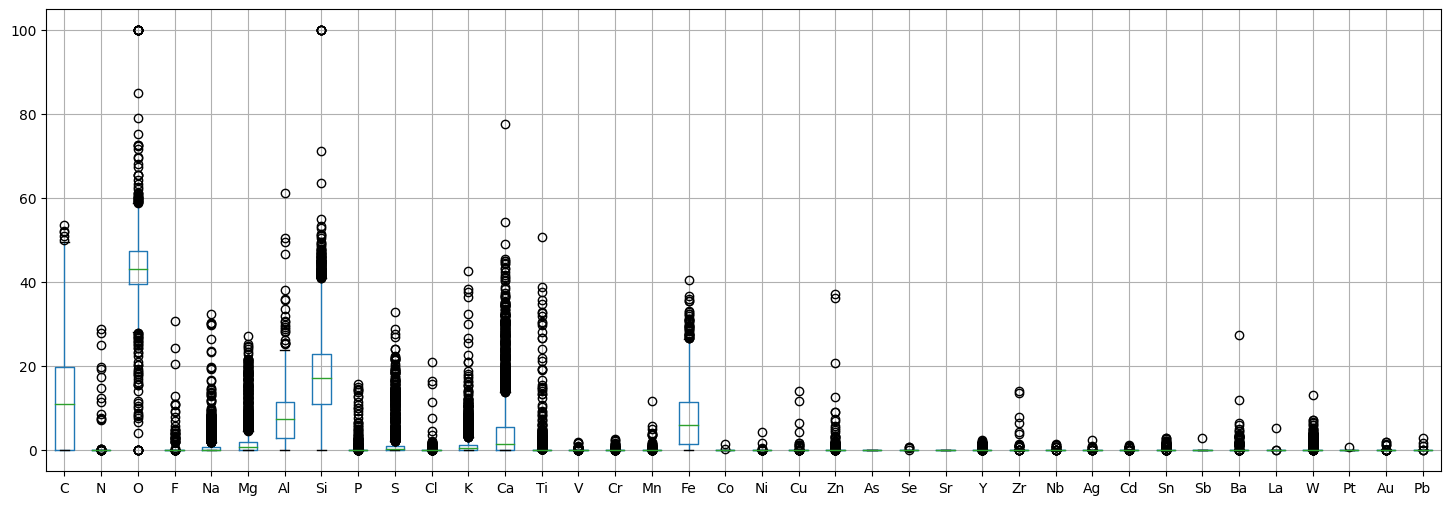

In [ ]:
columns_list = list(df.columns)
H_idx = columns_list.index('H')
mineral_chemic = mineral_df.iloc[:, H_idx:columns_list.index('Bi')]
mineral_chemic.loc[:, (df != 0).any(axis=0)].boxplot(figsize=(18, 6))

<Axes: >

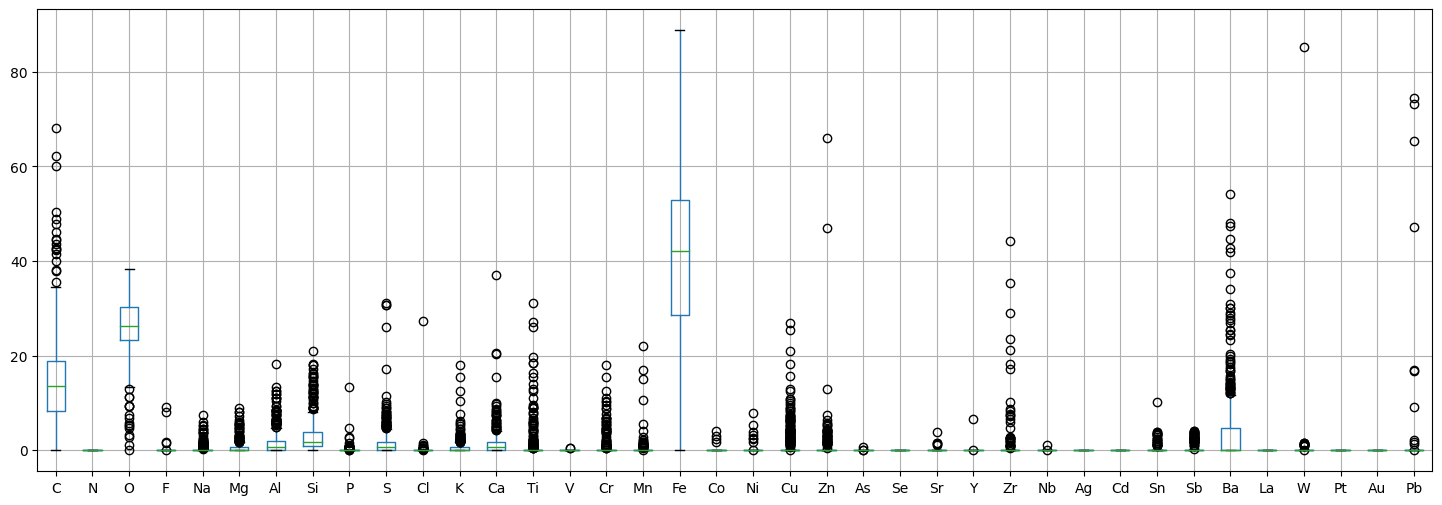

In [ ]:
metallic_df = df[df.Group == 'Metallic']
columns_list = list(df.columns)
H_idx = columns_list.index('H')
metallic_chemic = metallic_df.iloc[:, H_idx:columns_list.index('Bi')]
metallic_chemic.loc[:, (df != 0).any(axis=0)].boxplot(figsize=(18, 6))

<Axes: >

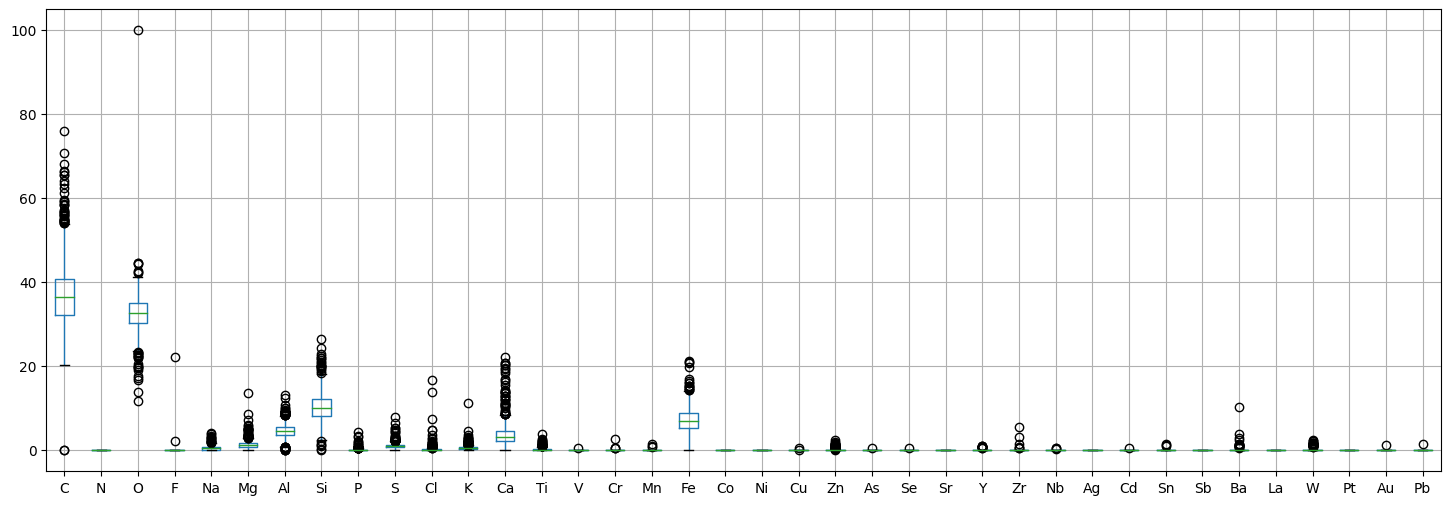

In [ ]:
tire_df = df[df.Group == 'Tire wear']
columns_list = list(df.columns)
H_idx = columns_list.index('H')
tire_chemic = tire_df.iloc[:, H_idx:columns_list.index('Bi')]
tire_chemic.loc[:, (df != 0).any(axis=0)].boxplot(figsize=(18, 6))

<Axes: >

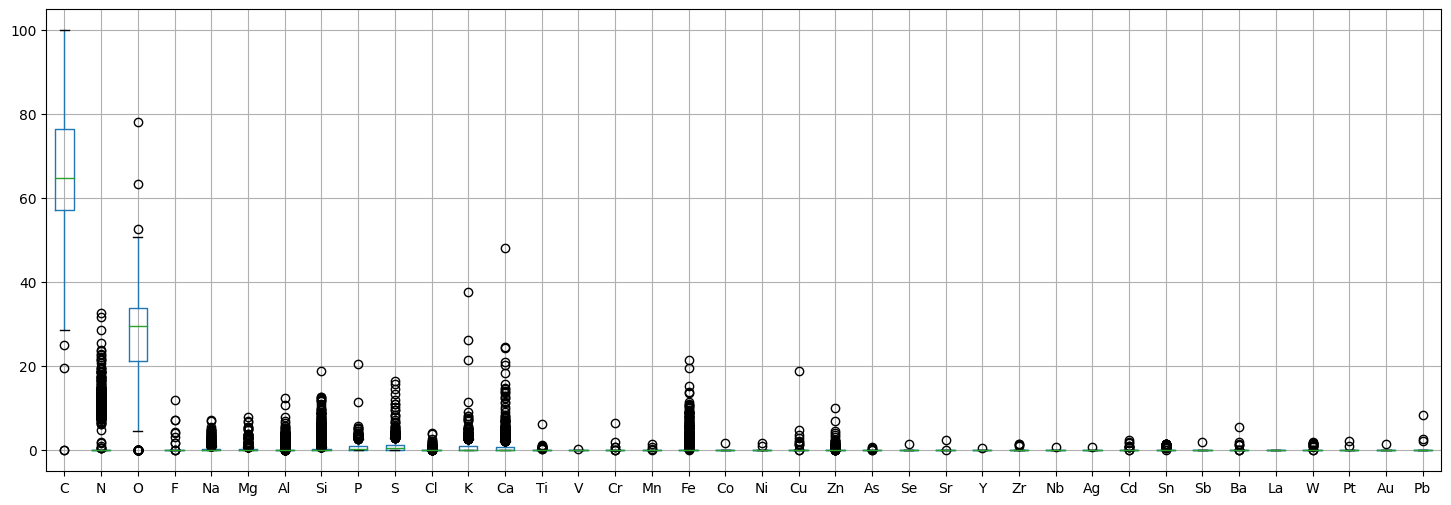

In [ ]:
organic_df = df[df.Group == 'Biogenic_Organic']
columns_list = list(df.columns)
H_idx = columns_list.index('H')
organic_chemic = organic_df.iloc[:, H_idx:columns_list.index('Bi')]
organic_chemic.loc[:, (df != 0).any(axis=0)].boxplot(figsize=(18, 6))

## Chemical composition per target

In [ ]:
H_idx = columns_list.index('H')
#grp = df.iloc[:, H_idx:columns_list.index('Bi')]
#grp['Group'] = df['Group'].copy()
grp = df[chemic_features + ['Group']]
grp = grp.groupby('Group', group_keys=False).apply(lambda x: x.sample(50, replace=True)).copy()
vis = grp.copy()
vis.Group = vis.Group.astype('category').cat.codes
fig = px.parallel_coordinates(vis.reset_index().drop('index', axis=1), color = "Group",
                        range_color=[0, 5],color_continuous_scale=[(0.00, "grey"),   (0.16, "grey"),
                                                (0.16, "red"), (0.33, "red"),
                                                (0.33, "blue"), (0.49, "blue"),
                                                (0.49, "yellow"), (0.65, "yellow"),
                                                (0.65, "green"), (0.81, "green"),
                                                (0.81, "orange"), (1, "orange")])

fig.update_layout(coloraxis_colorbar=dict(
    title="Group",
    tickvals=[0,1,2,3,4,5],
    ticktext=list(grp.Group.unique()),
    lenmode="pixels", len=100,
))

# Morphology features

Inspect distribution of morphological features in each group.

In [ ]:
morph_features = ["GrayMean", "Solidity", "Irregularity", "ShapeFactor", "LengthMicron", "Eccentricity", "GrayKurt", "FractalDimR", "AreaMicron2", "GrayStd", "Grain3"]

<Axes: >

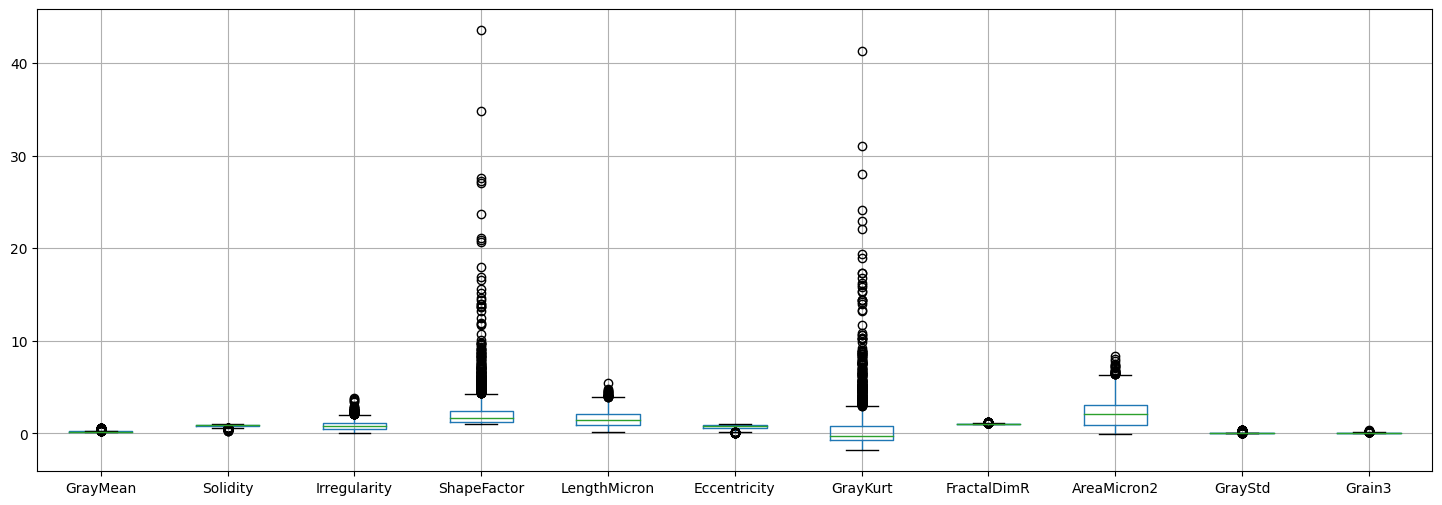

In [ ]:
organic_morph = organic_df[morph_features]
organic_morph["AreaMicron2"] = organic_morph["AreaMicron2"].transform('log')
organic_morph["Irregularity"] = organic_morph["Irregularity"].transform('log')
organic_morph["LengthMicron"] = organic_morph["LengthMicron"].transform('log')
organic_morph.boxplot(figsize=(18, 6))

<Axes: >

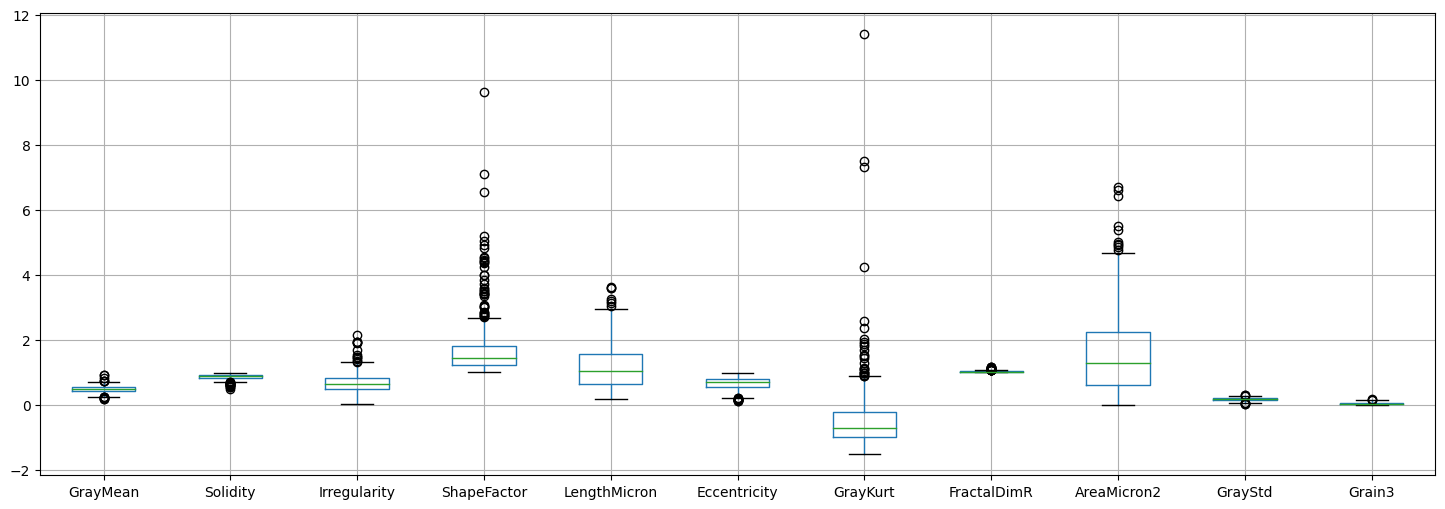

In [ ]:
metallic_morph = metallic_df[morph_features]
metallic_morph["AreaMicron2"] = metallic_morph["AreaMicron2"].transform('log')
metallic_morph["Irregularity"] = metallic_morph["Irregularity"].transform('log')
metallic_morph["LengthMicron"] = metallic_morph["LengthMicron"].transform('log')
metallic_morph.boxplot(figsize=(18, 6))

<Axes: >

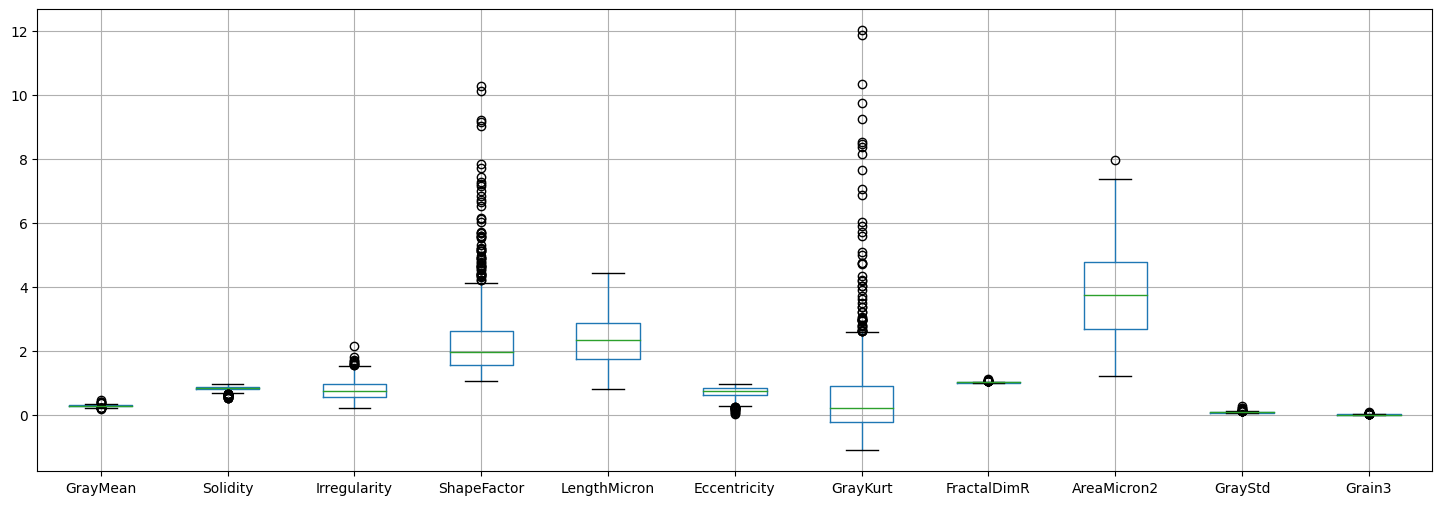

In [ ]:
tire_morph = tire_df[morph_features]
tire_morph["AreaMicron2"] = tire_morph["AreaMicron2"].transform('log')
tire_morph["Irregularity"] = tire_morph["Irregularity"].transform('log')
tire_morph["LengthMicron"] = tire_morph["LengthMicron"].transform('log')
tire_morph.boxplot(figsize=(18, 6))

<Axes: >

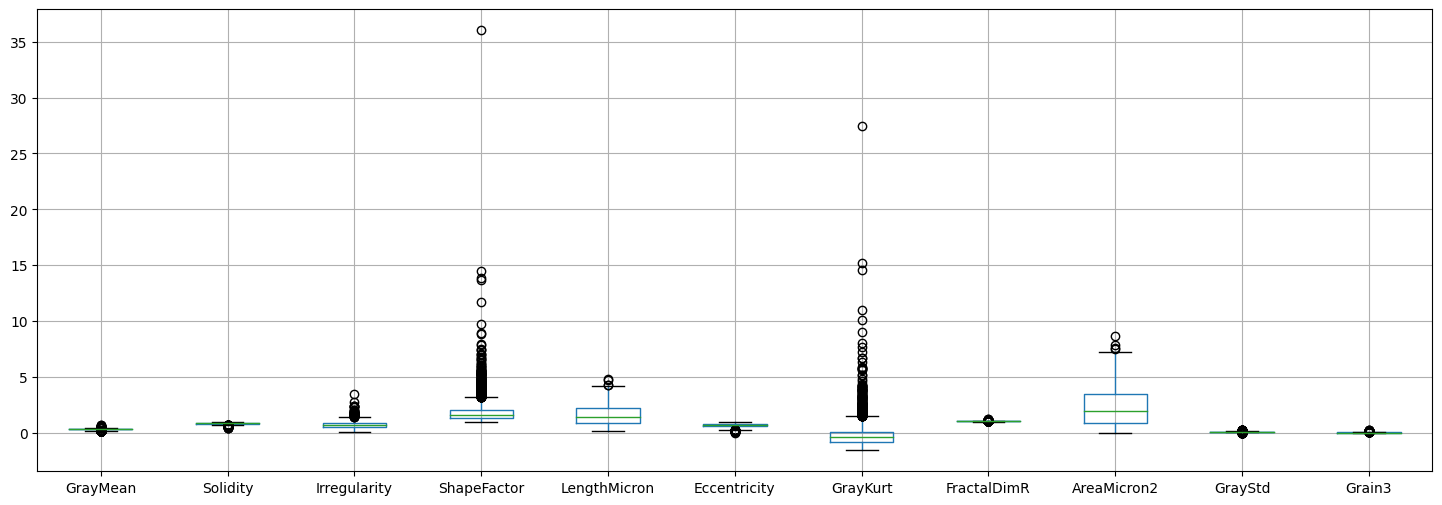

In [ ]:
mineral_morph = mineral_df[morph_features]
mineral_morph["AreaMicron2"] = mineral_morph["AreaMicron2"].transform('log')
mineral_morph["Irregularity"] = mineral_morph["Irregularity"].transform('log')
mineral_morph["LengthMicron"] = mineral_morph["LengthMicron"].transform('log')
mineral_morph.boxplot(figsize=(18, 6))

In [ ]:
grp = df[morph_features + ['Group']]
grp["AreaMicron2"] = grp["AreaMicron2"].transform('log')
grp["Irregularity"] = grp["Irregularity"].transform('log')
grp["LengthMicron"] = grp["LengthMicron"].transform('log')
grp = grp.groupby('Group', group_keys=False).apply(lambda x: x.sample(50, replace=True)).copy()
vis = grp.copy()
vis.Group = vis.Group.astype('category').cat.codes
fig = px.parallel_coordinates(vis.reset_index().drop('index', axis=1), color = "Group",
                        range_color=[0, 5],color_continuous_scale=[(0.00, "grey"),   (0.16, "grey"),
                                                (0.16, "red"), (0.33, "red"),
                                                (0.33, "blue"), (0.49, "blue"),
                                                (0.49, "yellow"), (0.65, "yellow"),
                                                (0.65, "green"), (0.81, "green"),
                                                (0.81, "orange"), (1, "orange")])

fig.update_layout(coloraxis_colorbar=dict(
    title="Group",
    tickvals=[0,1,2,3,4,5],
    ticktext=list(grp.Group.unique()),
    lenmode="pixels", len=100,
))

# Distribution of particle sizes and concentration

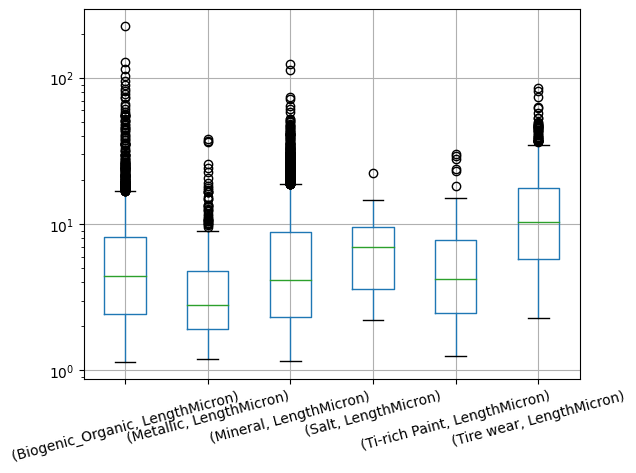

In [ ]:
import matplotlib.pyplot as plt

lengt_df = df[["Group", "LengthMicron"]]
#lengt_df["LengthMicron"] = lengt_df["LengthMicron"].transform('log')
plt.yscale("log")
lengt_df[["Group", "LengthMicron"]].groupby('Group').boxplot(subplots=False, figsize=(15, 8))
_ =plt.xticks(rotation = 15)

## Distribution per station.

In [ ]:
df.Sample.value_counts()

ME22_MA_P1                   1218
ME22_MA_P2                   1023
ME22_TG_P2                    982
ME22_TLY_P2                   962
BO22_Car_p1_sec. analysis     892
CA22_UV_p1_sec. analysis      871
ME22_MA_P3                    851
ME22_TG_P1                    333
ME22_TLY_P1                   288
Name: Sample, dtype: int64

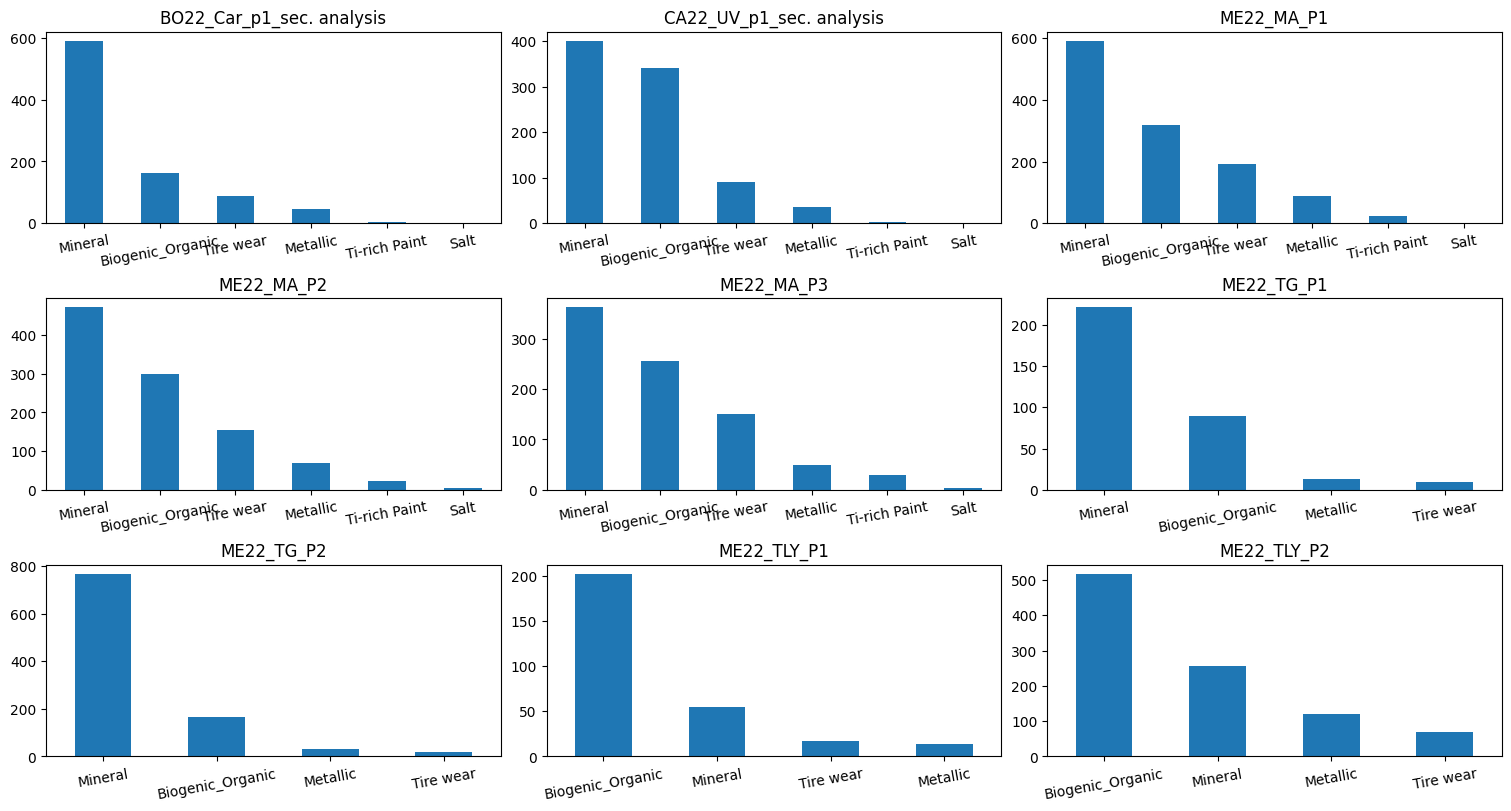

In [ ]:
_, axes = plt.subplots(3,3, figsize=(15, 8), constrained_layout=True)
axes = axes.ravel()

for station, ax in zip(df.Sample.unique(), axes):
    df[df.Sample == station].Group.value_counts().plot(kind="bar", ax= ax, title=station)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 10)

## Proporcion de particulas por estacion

In [ ]:
import plotly.express as px
vis = df.groupby(['Sample', 'Group']).Score.count().reset_index(name='count')
figGeneral = px.pie(vis, values='count', names='Group', title='Poporcion de grupos por estacion',
                    facet_col='Sample', facet_col_wrap=3)  # only plotly 5.9
figGeneral.update_layout(
    autosize=False,
    width=900,
    height=900)

In [ ]:
px.histogram(df, x="Sample", color="Group", barmode='group', title='Conteo de grupos por estacion')

## Tire - metallic
LLanta aparece con mayor proporcion en las 3 muestras de museo de antioquia seguido de las etaciones de bogota y la muestra numero 2 de tanques la Y. Esto puede indicar la presencia de alto flujo vehicular en estos muestreos.
Particulas metalicas aparecen con distribucion similar en los 3 sitios teniendo un pico en la segunda muestra de tanques la Y, indicando alto flujo vehicular descendiente de la pendiente durante el tiempo de muestreo.

## Minerales y organicos
Minerales aparecen con mayor proporcion en las estaciones urbanas sugiriendo resuspencion de suelos, con excepcion de tanques G2 donde se presenta un pico que puede indicar origenes de actividades de construccion.
Organicos aparecen en proporciones similares en todas las estaciones mostrando un pico en tanques y2.


## Salt - Ti Rich
sales y Ti Rich aparecen solo en estaciones urbanas con mayor en medida en MA donde se realizan muchas actividades de carpinteria y talleres de de autos.

# Check for grain size concentration per group and station.

In [ ]:
fig_df = df.groupby(['Group', 'Sample']).sum()["VolumeMicron3"].reset_index()
fig = px.bar(fig_df, x='Sample', y="VolumeMicron3", color='Group', title='Total VolumeMicron3 per sample and group.')#, text_auto=True)
# fig.update_layout(
#     autosize=False,
#     width=900,
#     height=900)
fig.show()

In [ ]:
#fig_df = df.groupby(['Group', 'Sample']).sum()["CmNormPM10-PM2.5 (µg/m3)"].reset_index()
fig = px.box(df, x='Sample', y="ECDMicron",title='Mean and standar desviation of ECDMicron per sample.')#, text_auto=True)
# fig.update_layout(
#     autosize=False,
#     width=900,
#     height=900)

fig.show()

In [ ]:
centered_df = df[df['ECDMicron'] < df['ECDMicron'].quantile(0.8)]

In [ ]:
#fig_df = df.groupby(['Group', 'Sample']).sum()["CmNormPM10-PM2.5 (µg/m3)"].reset_index()
fig = px.box(centered_df, x='Sample', y="ECDMicron",title='Mean and standar desviation of ECDMicron per sample.')#, text_auto=True)

fig.show()

# histogram of EDCMicron per sample.

In [ ]:
fig = px.histogram(centered_df, x="ECDMicron", color='Sample',
                  title=' Histogram of ECDMicron pero sample')

#fig.update_xaxes(title="ECDMicron", tickfont=dict(size=12))
fig.update_xaxes(showticklabels=True)
fig.show()

In [ ]:
fig_df = df.groupby(['Sample', 'Group']).sum()["CmNormPM10-PM2.5 (µg/m3)"].reset_index()
fig = px.bar(fig_df, y="CmNormPM10-PM2.5 (µg/m3)", x='Sample', color='Group',
                  title=' Total CmNorm PM10-2.5 per sample')

fig.update_xaxes(title="Sample", tickfont=dict(size=12))
fig.update_xaxes(showticklabels=True)
fig.show()
# fig_df

# Clustering
cluster particles by features with T-sne dim reduction


In [ ]:
features = morph_features + chemic_features
#features.append("Group")

In [ ]:
cl_df = df[features]
cl_df["AreaMicron2"] = cl_df["AreaMicron2"].transform('log')
cl_df["Irregularity"] = cl_df["Irregularity"].transform('log')
cl_df["LengthMicron"] = cl_df["LengthMicron"].transform('log')
cl_df

,GrayMean,Solidity,Irregularity,ShapeFactor,LengthMicron,Eccentricity,GrayKurt,FractalDimR,AreaMicron2,GrayStd,Grain3,Si,C,O,P,Cl,Na,Ca,Al,Fe
0,0.214,0.782,1.779181,4.220,2.793065,0.975,-1.009,1.042,3.587400,0.041,0.025,0.000,58.245,38.407,1.272,0.293,0.000,0.000,0.000,0.000
1,0.234,0.863,1.495373,2.724,2.570549,0.972,-0.985,1.013,3.294503,0.052,0.010,0.000,58.868,36.102,1.123,0.505,0.354,0.000,0.000,0.000
2,0.201,0.956,0.273837,1.141,1.545006,0.541,-0.133,1.012,2.637842,0.026,0.000,0.000,66.937,31.014,0.658,0.000,0.309,0.000,0.000,0.000
3,0.238,0.973,0.413433,1.087,1.344951,0.721,0.086,1.001,2.139125,0.042,0.000,0.000,56.770,32.504,0.956,0.000,0.000,0.000,0.000,0.000
4,0.227,0.973,0.093490,1.010,1.099612,0.267,2.696,1.001,1.936148,0.029,0.000,0.270,85.876,13.854,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7415,0.315,0.796,0.954357,2.153,2.265714,0.767,0.673,1.015,3.507118,0.092,0.016,10.747,34.808,33.543,0.000,0.000,0.486,1.759,5.756,10.721
7416,0.300,0.917,0.509825,1.274,1.640549,0.703,-0.146,1.008,2.727918,0.081,0.023,5.470,44.663,32.910,0.221,0.000,0.298,2.212,2.763,8.667
7417,0.203,0.664,1.010873,5.696,2.006199,0.524,9.749,1.066,3.123202,0.064,0.012,9.509,36.093,31.405,0.000,0.000,0.519,0.783,4.940,11.889
7418,0.312,0.829,0.692647,1.789,1.420937,0.395,3.081,1.035,2.130966,0.084,0.032,4.181,32.476,35.681,0.000,0.000,0.508,12.860,1.610,10.304


In [ ]:
#import the method
from sklearn.manifold import TSNE
#set the hyperparmateres
keep_dims = 2
#lrn_rate = 700
prp = 40
#extract the data as a cop
tsnedf = cl_df.copy()
#creae the model
tsne = TSNE(n_components = keep_dims,
            perplexity = prp,
            random_state = 42,
            n_iter = 5000,
            n_jobs = 1)
#apply it to the data
X_dimensions = tsne.fit_transform(tsnedf)
#check the shape
X_dimensions.shape

(7420, 2)

In [ ]:
X_dimensions

array([[ 72.30226  , -64.451385 ],
       [ 74.25443  , -56.03432  ],
       [106.29108  , -29.08838  ],
       ...,
       [ 21.499212 ,   7.5571365],
       [  2.190005 , -29.754528 ],
       [ 52.323006 ,   3.3064916]], dtype=float32)

In [ ]:
tsnedf_res = pd.DataFrame(data = X_dimensions,
                         columns = ["Dimension 1",
                                "Dimension 2"])

In [ ]:
tsnedf_res["Group"] = df.Group.copy()

In [ ]:
tsnedf_res

,Dimension 1,Dimension 2,Group
0,72.302261,-64.451385,Biogenic_Organic
1,74.254433,-56.034321,Biogenic_Organic
2,106.291077,-29.088381,Biogenic_Organic
3,63.591949,-31.390947,Biogenic_Organic
4,87.111076,54.044319,Biogenic_Organic
...,...,...,...
7415,13.724695,20.503298,Tire wear
7416,44.363308,15.856302,Tire wear
7417,21.499212,7.557137,Tire wear
7418,2.190005,-29.754528,Tire wear


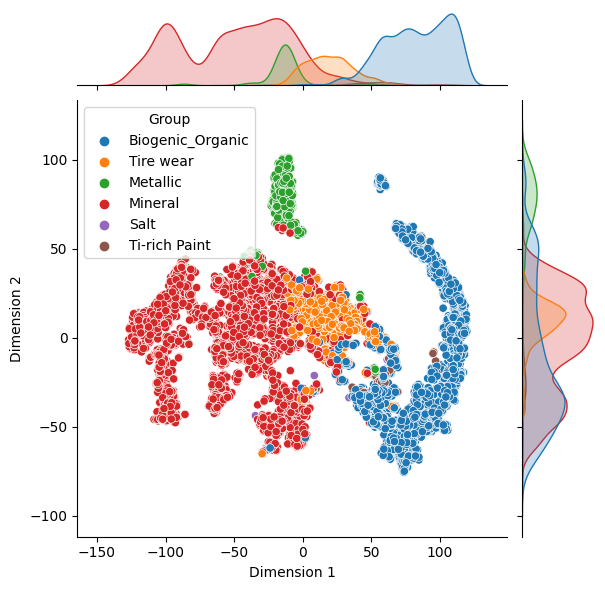

In [ ]:
import seaborn as sns

#plot the result
g = sns.jointplot(data = tsnedf_res,
                 x = "Dimension 1",
                 y = "Dimension 2",
                 hue = "Group")

## Train Binomial Logistic regession.

In [ ]:
cl_df["Group"] = df.Group.copy()
cl_df['Score'] = df.Score.copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cl_df.iloc[:, :-2], cl_df.Group, test_size=0.30, random_state=42)
print(len(X_train), len(X_test))

5194 2226


In [ ]:
from sklearn.linear_model import LogisticRegression

sklg = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
sklg.fit(X_train, y_train)
pred = sklg.predict(X_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
print(classification_report(y_test, pred))

                  precision    recall  f1-score   support

Biogenic_Organic       0.95      0.97      0.96       719
        Metallic       0.97      0.91      0.94       136
         Mineral       0.95      0.97      0.96      1109
            Salt       0.50      0.25      0.33         4
   Ti-rich Paint       0.00      0.00      0.00        19
       Tire wear       0.85      0.78      0.82       239

        accuracy                           0.94      2226
       macro avg       0.70      0.65      0.67      2226
    weighted avg       0.93      0.94      0.93      2226



In [ ]:
confusion_matrix(y_test, pred)

array([[ 697,    0,    7,    0,    2,   13],
       [   2,  124,    9,    0,    1,    0],
       [   7,    3, 1080,    1,    0,   18],
       [   1,    0,    2,    1,    0,    0],
       [  18,    0,    0,    0,    0,    1],
       [  12,    1,   39,    0,    0,  187]])

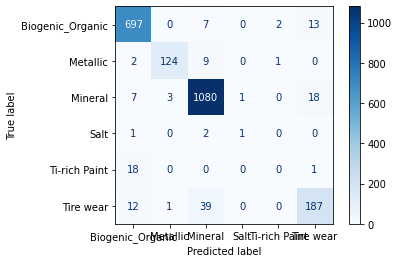

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='Blues')